# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Notebook Presentation

In [2]:
pd.options.display.float_format = "{:,.2f}".format

In [3]:
COLOR_GOOD_TO_BAD = ["navy", "darkred"]
COLOR_RACE_PALETTE_DICT = {"white": "#636efa", "black": "#333333", "hispanic": "#455100", "asian": "#ffce1b", "native_american": "#aa2222", "n/a": "lightgrey"}
COLOR_RACE_PALETTE = ["#636efa", "#333333", "#455100", "#ffce1b", "#aa2222", "lightgrey"]
COLOR_MAN_WOMAN_DICT = {"men": "#636efa", "woman": "#ff6692"}

## Load the Data

In [4]:
df_hh_income = pd.read_csv("./data/Median_Household_Income_2015.csv", encoding="windows-1252")
df_pct_poverty = pd.read_csv("./data/Pct_People_Below_Poverty_Level.csv", encoding="windows-1252")
df_pct_completed_hs = pd.read_csv("./data/Pct_Over_25_Completed_High_School.csv", encoding="windows-1252")
df_share_race_city = pd.read_csv("./data/Share_of_Race_By_City.csv", encoding="windows-1252")
df_fatalities = pd.read_csv("./data/Deaths_by_Police_US.csv", encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(f"Shape of the df median household income {df_hh_income.shape}")
print(f"Shape of the df pct people below poverty level {df_pct_poverty.shape}")
print(f"Shape of the df pct people over 25 completed high school {df_pct_completed_hs.shape}")
print(f"Shape of the df share of race by city {df_share_race_city.shape}")
print(f"Shape of the df death by police {df_fatalities.shape}")

Shape of the df median household income (29322, 3)
Shape of the df pct people below poverty level (29329, 3)
Shape of the df pct people over 25 completed high school (29329, 3)
Shape of the df share of race by city (29268, 7)
Shape of the df death by police (8002, 17)


In [6]:
print(df_hh_income.info())
print("\n-----------------------------------------------------\n")
print(df_hh_income.head(3))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB
None

-----------------------------------------------------

  Geographic Area             City Median Income
0              AL       Abanda CDP         11207
1              AL   Abbeville city         25615
2              AL  Adamsville city         42575


In [7]:
print(df_pct_poverty.info())
print("\n-----------------------------------------------------\n")
print(df_pct_poverty.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
None

-----------------------------------------------------

  Geographic Area             City poverty_rate
0              AL       Abanda CDP         78.8
1              AL   Abbeville city         29.1
2              AL  Adamsville city         25.5


In [8]:
print(df_pct_completed_hs.info())
print("\n-----------------------------------------------------\n")
print(df_pct_completed_hs.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
None

-----------------------------------------------------

  Geographic Area             City percent_completed_hs
0              AL       Abanda CDP                 21.2
1              AL   Abbeville city                 69.1
2              AL  Adamsville city                 78.9


In [9]:
print(df_share_race_city.info())
print("\n-----------------------------------------------------\n")
print(df_share_race_city.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB
None

-----------------------------------------------------

  Geographic area             City share_white share_black  \
0              AL       Abanda CDP        67.2        30.2   
1              AL   Abbeville city        54.4        41.4   
2              AL  Adamsville city        52.3        44.9   

  share_native_american share_asian share_hispanic  
0                     0       

In [10]:
print(df_fatalities.info())
print("\n-----------------------------------------------------\n")
print(df_fatalities.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8002 non-null   int64  
 1   name                     7548 non-null   object 
 2   date                     8002 non-null   object 
 3   manner_of_death          8002 non-null   object 
 4   armed                    7791 non-null   object 
 5   age                      7499 non-null   float64
 6   gender                   7971 non-null   object 
 7   race                     6485 non-null   object 
 8   city                     8002 non-null   object 
 9   state                    8002 non-null   object 
 10  signs_of_mental_illness  8002 non-null   bool   
 11  threat_level             8002 non-null   object 
 12  flee                     7036 non-null   object 
 13  body_camera              8002 non-null   bool   
 14  longitude               

In [11]:
print("df_hh_income")
print(df_hh_income.isna().sum())
print("\n\n")
print("df_pct_poverty")
print(df_pct_poverty.isna().sum())
print("\n\n")
print("df_pct_completed_hs")
print(df_pct_completed_hs.isna().sum())
print("\n\n")
print("df_share_race_city")
print(df_share_race_city.isna().sum())
print("\n\n")
print("df_fatalities")
print(df_fatalities.isna().sum())


df_hh_income
Geographic Area     0
City                0
Median Income      51
dtype: int64



df_pct_poverty
Geographic Area    0
City               0
poverty_rate       0
dtype: int64



df_pct_completed_hs
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64



df_share_race_city
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64



df_fatalities
id                            0
name                        454
date                          0
manner_of_death               0
armed                       211
age                         503
gender                       31
race                       1517
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        966
body_camera                   0
longitude  

In [12]:
print(df_hh_income[df_hh_income.duplicated(["Geographic Area", "City"])])
print("\n\n")
print(df_pct_poverty[df_pct_poverty.duplicated(["Geographic Area", "City"])])
print("\n\n")
print(df_pct_completed_hs[df_pct_completed_hs.duplicated(["Geographic Area", "City"])])
print("\n\n")
print(df_share_race_city[df_share_race_city.duplicated(["Geographic area", "City"])]) #'area' written with a as lowercase
print("\n\n")
print(df_fatalities[df_fatalities.duplicated(["id"])])

Empty DataFrame
Columns: [Geographic Area, City, Median Income]
Index: []



Empty DataFrame
Columns: [Geographic Area, City, poverty_rate]
Index: []



Empty DataFrame
Columns: [Geographic Area, City, percent_completed_hs]
Index: []



Empty DataFrame
Columns: [Geographic area, City, share_white, share_black, share_native_american, share_asian, share_hispanic]
Index: []



Empty DataFrame
Columns: [id, name, date, manner_of_death, armed, age, gender, race, city, state, signs_of_mental_illness, threat_level, flee, body_camera, longitude, latitude, is_geocoding_exact]
Index: []


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [13]:
df_hh_income["Median Income"] = df_hh_income["Median Income"].replace("(X)", np.nan)
df_hh_income["Median Income"] = df_hh_income["Median Income"].replace("-", np.nan)
df_hh_income["Median Income"] = df_hh_income["Median Income"].replace("2,500-", np.nan) #Maybe i am wrong, but it is unreasonable to replace it with 0.
df_hh_income["Median Income"] = df_hh_income["Median Income"].replace("250,000+", 250000) #Not the right way to do so, but i believe it is reasonable.
df_hh_income["Median Income"] = df_hh_income["Median Income"].astype(float)
df_hh_income["Median Income"].describe()

count    27,409.00
mean     51,351.98
std      25,562.10
min       4,511.00
25%      35,625.00
50%      45,313.00
75%      59,549.00
max     250,000.00
Name: Median Income, dtype: float64

In [14]:
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].replace("-", np.nan)
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].astype(float)
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].div(100)
df_pct_poverty["poverty_rate"].describe()

count   29,128.00
mean         0.16
std          0.13
min          0.00
25%          0.07
50%          0.14
75%          0.23
max          1.00
Name: poverty_rate, dtype: float64

In [15]:
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].replace("-", np.nan)
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].astype(float)
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].div(100)
df_pct_completed_hs["percent_completed_hs"].describe()

count   29,132.00
mean         0.86
std          0.12
min          0.00
25%          0.81
50%          0.88
75%          0.94
max          1.00
Name: percent_completed_hs, dtype: float64

In [16]:
columns = ["share_white", "share_black", "share_hispanic", "share_asian", "share_native_american"]

df_share_race_city[columns] = df_share_race_city[columns].replace("-", np.nan)
df_share_race_city[columns] = df_share_race_city[columns].replace("(X)", np.nan)
df_share_race_city[columns] = df_share_race_city[columns].astype(float)
df_share_race_city[columns] = df_share_race_city[columns].div(100)

df_share_race_city[columns].describe()

,share_white,share_black,share_hispanic,share_asian,share_native_american
count,"29,248.00","29,248.00","29,248.00","29,248.00","29,248.00"
mean,0.83,0.07,0.09,0.02,0.03
std,0.22,0.16,0.18,0.04,0.13
min,0.00,0.00,0.00,0.00,0.00
25%,0.79,0.00,0.01,0.00,0.00
50%,0.93,0.01,0.03,0.00,0.00
75%,0.97,0.04,0.08,0.01,0.01
max,1.00,1.00,1.00,0.67,1.00


In [17]:
df_fatalities.date = pd.to_datetime(df_fatalities.date, format='%Y-%m-%d')

df_fatalities.race = df_fatalities.race.replace("W", "white")
df_fatalities.race = df_fatalities.race.replace("B", "black")
df_fatalities.race = df_fatalities.race.replace("H", "hispanic")
df_fatalities.race = df_fatalities.race.replace("N", "native_american")
df_fatalities.race = df_fatalities.race.replace("A", "asian")
df_fatalities.race = df_fatalities.race.replace("O", "other")

df_fatalities.gender = df_fatalities.gender.replace("M", "men")
df_fatalities.gender = df_fatalities.gender.replace("F", "woman")


In [18]:
df_share_race_city.rename(columns={"Geographic area": "Geographic Area"}, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [19]:
state_poverty_rate = df_pct_poverty.copy()

# Not most significat method to calculate this indicator.
state_poverty_rate = state_poverty_rate.groupby("Geographic Area").agg(
    {"poverty_rate": pd.Series.mean}).sort_values(by="poverty_rate", ascending=False)

state_poverty_rate.poverty_rate = state_poverty_rate.poverty_rate.mul(
    100).round(2)
state_poverty_rate.rename(columns={"poverty_rate": "Mean Poverty Rate"}, inplace=True)

In [20]:
fig = px.bar(state_poverty_rate,
             x=state_poverty_rate.index,
             y="Mean Poverty Rate",
             title="Percentage of Poverty on Each U.S.A. State<br><sup>Calculated using the mean from the cities</sup>", 
             color="Mean Poverty Rate", 
             color_continuous_scale=COLOR_GOOD_TO_BAD, 
             width=1300,
             height=600)

fig.update_layout(xaxis_title="State",
                  yaxis_title="Poverty (%)",
                  font={"size": 12},
                  coloraxis_showscale=False)

fig.update_yaxes(range=[5, 30])
fig.update_xaxes(tickangle=0)

fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [21]:
state_hs_grad_rate = df_pct_completed_hs.copy()

#Not most significat method to calculate this indicator.
state_hs_grad_rate = state_hs_grad_rate.groupby("Geographic Area").agg(
    {"percent_completed_hs": pd.Series.mean}).sort_values(by="percent_completed_hs", ascending=True)

state_hs_grad_rate.percent_completed_hs = state_hs_grad_rate.percent_completed_hs.mul(100).round(2)
state_hs_grad_rate.rename(columns={"percent_completed_hs": "Mean Rate of HS Grad"}, inplace=True)

In [22]:
fig = px.bar(state_hs_grad_rate, 
             y="Mean Rate of HS Grad",
             x=state_hs_grad_rate.index,
             title="Percentage of High-School Completion on Each U.S.A. State<br><sup>Calculated using the mean from the cities</sup>", 
             color="Mean Rate of HS Grad", 
             color_continuous_scale=COLOR_GOOD_TO_BAD[::-1],
             width=1200,
             height=600)

fig.update_layout(xaxis_title="State",
                  yaxis_title="High-School Completion (%)",
                  font={"size": 11},
                  coloraxis_showscale=False)

fig.update_yaxes(range=[75, 95])
fig.update_xaxes(tickangle=0)

fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [23]:
corr_poverty_hsgrad = pd.merge(state_poverty_rate, state_hs_grad_rate, left_index=True, right_index=True)
corr_poverty_hsgrad = corr_poverty_hsgrad.sort_values(by="Mean Rate of HS Grad", ascending=False)

In [24]:
fig = px.scatter(corr_poverty_hsgrad,
                 x="Mean Poverty Rate",
                 y="Mean Rate of HS Grad",
                 color="Mean Poverty Rate",
                 color_continuous_scale=COLOR_GOOD_TO_BAD,
                 width=1300,
                 height=600)

fig.update_layout(title="Correlation between Poverty Rate and High-School Graduation Rate for U.S.A. States",
                  xaxis_title="State Poverty (%)",
                  yaxis_title="State High-School Graduation (%)")

fig.update_traces(marker={"size": 15})

fig.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

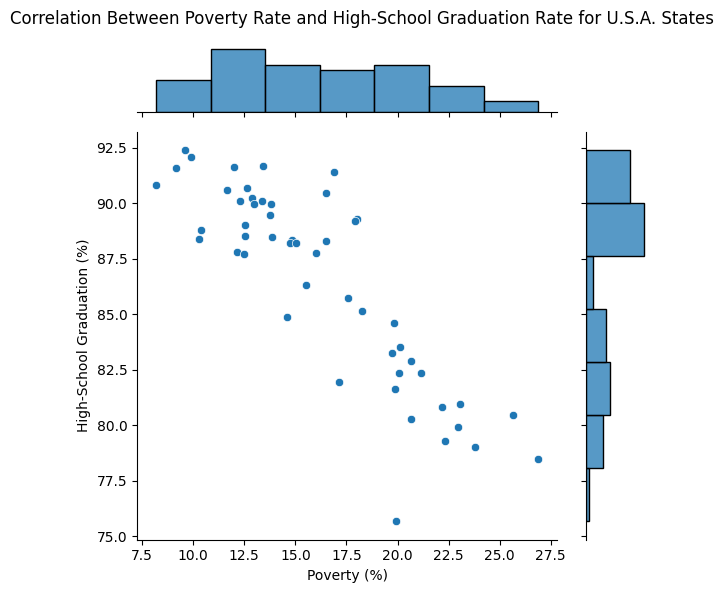

In [25]:
joint_plot = sns.jointplot(data=corr_poverty_hsgrad,
                           x="Mean Poverty Rate", 
                           y="Mean Rate of HS Grad")

joint_plot.set_axis_labels("Poverty (%)", "High-School Graduation (%)")
joint_plot.figure.suptitle("Correlation Between Poverty Rate and High-School Graduation Rate for U.S.A. States", fontsize=12)

joint_plot.figure.tight_layout()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

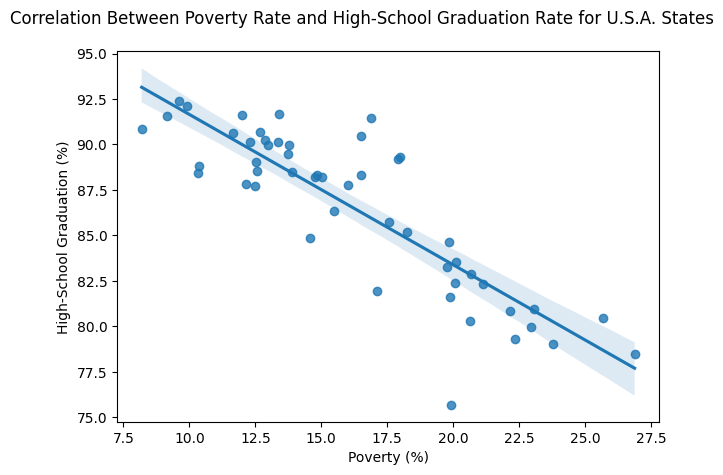

In [26]:
regplot = sns.regplot(data=corr_poverty_hsgrad,
                      x="Mean Poverty Rate", 
                      y="Mean Rate of HS Grad")

regplot.set_xlabel("Poverty (%)")
regplot.set_ylabel("High-School Graduation (%)")
regplot.figure.suptitle("Correlation Between Poverty Rate and High-School Graduation Rate for U.S.A. States", fontsize=12)

regplot.figure.tight_layout()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [27]:
state_race_dist = df_share_race_city.groupby("Geographic Area").agg(
    {"share_white": pd.Series.mean, "share_black": pd.Series.mean, "share_hispanic": pd.Series.mean, "share_asian": pd.Series.mean, "share_native_american": pd.Series.mean})

In [28]:
# Correcting for values above or below 100%, supposing the proportion is correct.
state_race_dist[state_race_dist.columns] = state_race_dist[state_race_dist.columns].apply(lambda x: x / x.sum(), axis=1)

state_race_dist.rename(columns={"share_white": "White", "share_black": "Black", "share_hispanic": "Hispanic",
                       "share_asian": "Asian", "share_native_american": "Native American"}, inplace=True)

state_race_dist.sort_values(by=["White"], ascending=False, inplace=True)

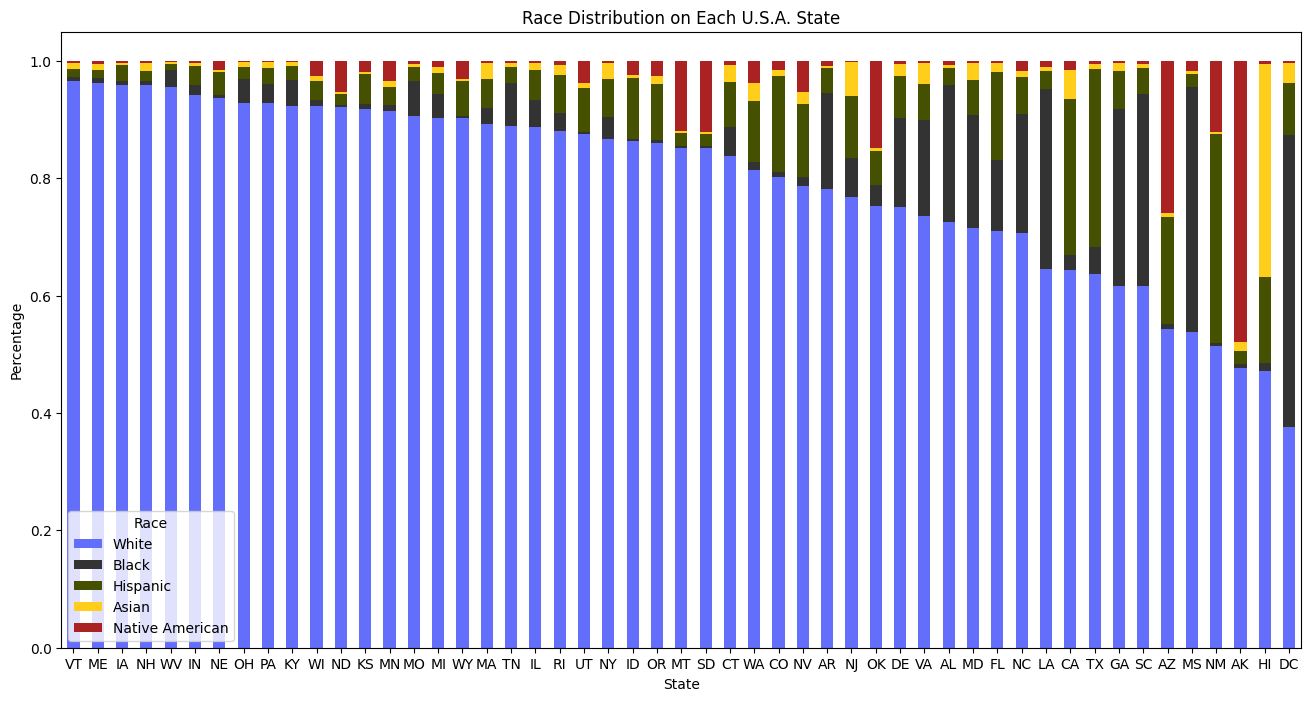

In [29]:
state_race_dist.plot(kind='bar', stacked=True, figsize=(16, 8), color=COLOR_RACE_PALETTE)

plt.title("Race Distribution on Each U.S.A. State")
plt.xlabel("State")
plt.ylabel("Percentage")
plt.legend(title="Race")

plt.xticks(rotation=0)

plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [30]:
df_fatalities_per_race = df_fatalities.copy()

df_fatalities_per_race.race = df_fatalities_per_race.race.fillna("n/a")
df_fatalities_per_race = df_fatalities_per_race.value_counts("race")

In [31]:
fig = px.pie(df_fatalities_per_race, values=df_fatalities_per_race.values, names=df_fatalities_per_race.index, color=df_fatalities_per_race.index,
             title="Killed by Police<br><sub>Race Distribution</sub>", width=800, height=600, hole=.5, color_discrete_map=COLOR_RACE_PALETTE_DICT)
fig.update_layout(font={"size": 16})

fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [32]:
df_fatalities_per_gender = df_fatalities.copy()

df_fatalities_per_gender = df_fatalities_per_gender.value_counts("gender")

In [33]:
fig = px.pie(df_fatalities_per_gender, values=df_fatalities_per_gender.values, names=df_fatalities_per_gender.index, color=df_fatalities_per_gender.index,
             title="Killed by Police<br><sub>Gender Distribution</sub>", width=800, height=600, hole=.5, color_discrete_map=COLOR_MAN_WOMAN_DICT)
fig.update_layout(font={"size": 16})

fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [34]:
fig = px.box(df_fatalities,
             x="manner_of_death",
             y="age",
             color="gender",
             title="Age Distribution by Manner of Death<br><sup>Separated by gender</sup>",
             color_discrete_map=COLOR_MAN_WOMAN_DICT)

fig.update_layout(font={"size": 16}, width=1000, height=600,
                  xaxis_title="Manner of Death", yaxis_title="Age")

fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [35]:
df_fatalities_armed = df_fatalities.copy()

df_fatalities_armed['armed'] = df_fatalities_armed['armed'].apply(lambda x: 'unarmed' if x == 'unarmed' else ('armed' if pd.notna(x) else x))
df_fatalities_armed['armed'] = df_fatalities_armed['armed'].fillna("n/a")

df_fatalities_armed = df_fatalities_armed.armed.value_counts()


In [36]:
fig = px.pie(df_fatalities_armed,
             values=df_fatalities_armed.values,
             names=df_fatalities_armed.index,
             color=df_fatalities_armed.index,
             title="Was the Suspect Armed When Killed by the Police?",
             width=800, height=600,
             hole=.5,
             color_discrete_map={"armed": "darkred", "unarmed": "navy", "n/a": "lightgrey"})

fig.update_layout(font={"size": 16})

fig.show()

In [37]:
df_fatalities_type_arm = df_fatalities.copy()

df_fatalities_type_arm['armed'] = df_fatalities_type_arm['armed'].fillna("n/a")

#Removing the weapons used less than 30 times.
temp_value_count = df_fatalities_type_arm.armed.value_counts()
to_replace = temp_value_count[temp_value_count <= 30].index
df_fatalities_type_arm['armed'] = df_fatalities_type_arm['armed'].replace(to_replace, 'other')

df_fatalities_type_arm = df_fatalities_type_arm['armed'].value_counts()
df_fatalities_type_arm

armed
gun               4573
knife             1142
other              521
unarmed            460
undetermined       338
vehicle            284
toy weapon         248
n/a                211
unknown weapon     121
machete             65
Taser               39
Name: count, dtype: int64

In [38]:
fig = px.pie(df_fatalities_type_arm,
             values=df_fatalities_type_arm.values,
             names=df_fatalities_type_arm.index,
             color=df_fatalities_type_arm.index,
             title="Type of Weapon Suspect Was Using",
             width=800,
             height=600,
             hole=.5,
             color_discrete_map={"unarmed": "darkred"})

fig.update_layout(font={"size": 16})

fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [39]:
ages_killed = df_fatalities.age
ages_killed.dropna(inplace=True)
people_killed = len(ages_killed)
people_killed_under_25 = len(ages_killed[ages_killed < 25])

percentage_killed_under_25 = (people_killed_under_25 / people_killed) * 100
print(f"The percentage of people killed below 25 years old: {round(percentage_killed_under_25, 2)}%")

The percentage of people killed below 25 years old: 15.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

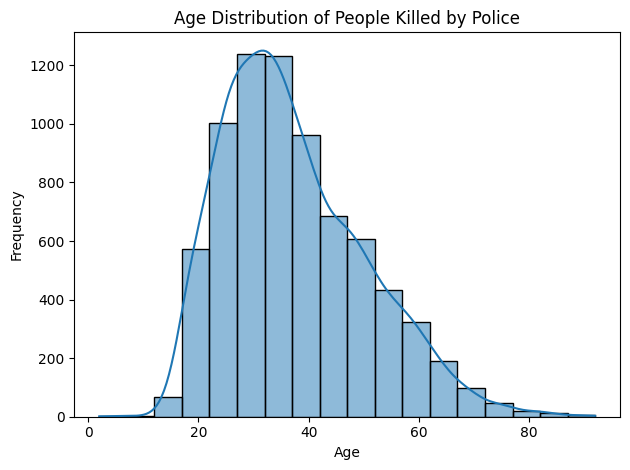

In [40]:
histplot = sns.histplot(df_fatalities, x="age", bins=18, kde=True)

histplot.set_xlabel("Age")
histplot.set_ylabel("Frequency")
histplot.set_title("Age Distribution of People Killed by Police")

histplot.figure.tight_layout()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [41]:
df_fatalities.race.unique()

array(['asian', 'white', 'hispanic', 'black', 'other', nan,
       'native_american'], dtype=object)

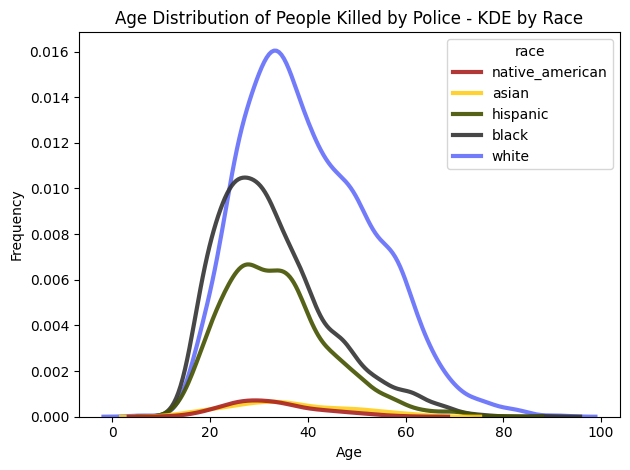

In [42]:
histplot = sns.kdeplot(data=df_fatalities, x="age", hue="race", hue_order=[
                       "native_american", "asian", "hispanic", "black", "white"], palette=COLOR_RACE_PALETTE_DICT, linewidth=3, alpha=0.9)

histplot.set_xlabel("Age")
histplot.set_ylabel("Frequency")
histplot.set_title("Age Distribution of People Killed by Police - KDE by Race")

histplot.figure.tight_layout()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [43]:
people_killed_by_race = df_fatalities.copy()
people_killed_by_race = people_killed_by_race.race.value_counts()

In [44]:
fig = px.bar(people_killed_by_race,
             y=people_killed_by_race.values,
             x=people_killed_by_race.index,
             title="Killed by Police<br><sub>Number of Fatalities by Race</sub>",
             color=people_killed_by_race.index,
             width=1200,
             height=600,
             color_discrete_map=COLOR_RACE_PALETTE_DICT)

fig.update_layout(xaxis_title="Race",
                  yaxis_title="Number of People Killed",
                  font={"size": 12})

fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [45]:
df_fatalities["city-state"] = df_fatalities.city + ", " + df_fatalities.state
most_dangerous_cities = df_fatalities["city-state"].value_counts().head(10)

In [46]:
fig = px.bar(most_dangerous_cities,
             y=most_dangerous_cities.values,
             x=most_dangerous_cities.index,
             color=most_dangerous_cities.values,
             color_continuous_scale=COLOR_GOOD_TO_BAD,
             title="Killed by Police<br><sub>Cities with the Highest Number of Fatalities</sub>",
             width=1200,
             height=600)

fig.update_layout(xaxis_title="City",
                  yaxis_title="Number of Fatalities",
                  font={"size": 12},
                  coloraxis_showscale=False)
fig.show()

In [47]:
#FIRST: GETTING THE RACE DISTRIBUTION FOR THE POPULATION OF EACH CITY

race_most_dangerous_cities = most_dangerous_cities.to_frame().reset_index().rename(
    columns={"city-state": "City", "count": "Fatalities"})

#Cities in the df_share_race_city came with a sufix, declaring if it is a city, a village... adjusting for this.
df_share_race_city_adjusted = df_share_race_city.copy()
df_share_race_city_adjusted["City"] = df_share_race_city_adjusted["City"].replace(" city", "", regex=True)
df_share_race_city_adjusted["city-state"] = df_share_race_city_adjusted["City"] + ", " + df_share_race_city_adjusted["Geographic Area"]

race_most_dangerous_cities['pop_share_white'] = race_most_dangerous_cities['City'].map(
    df_share_race_city_adjusted.set_index('city-state')['share_white'])
race_most_dangerous_cities['pop_share_black'] = race_most_dangerous_cities['City'].map(
    df_share_race_city_adjusted.set_index('city-state')['share_black'])
race_most_dangerous_cities['pop_share_native_american'] = race_most_dangerous_cities['City'].map(
    df_share_race_city_adjusted.set_index('city-state')['share_native_american'])
race_most_dangerous_cities['pop_share_asian'] = race_most_dangerous_cities['City'].map(
    df_share_race_city_adjusted.set_index('city-state')['share_asian'])
race_most_dangerous_cities['pop_share_hispanic'] = race_most_dangerous_cities['City'].map(
    df_share_race_city_adjusted.set_index('city-state')['share_hispanic'])

race_most_dangerous_cities = race_most_dangerous_cities.drop(columns=["Fatalities"])
race_most_dangerous_cities.set_index("City", inplace=True)
race_most_dangerous_cities[race_most_dangerous_cities.columns] = race_most_dangerous_cities[race_most_dangerous_cities.columns].apply(lambda x: x / x.sum(), axis=1)



In [48]:
#SECOND: GETTING THE RACE DISTRIBUTION FOR THE KILLED OF EACH CITY

rate_killed_most_dangerous_cities = df_fatalities[df_fatalities["city-state"].isin(
    race_most_dangerous_cities.index)]
rate_killed_most_dangerous_cities = rate_killed_most_dangerous_cities.groupby(
    ["city-state", "race"]).size().unstack(fill_value=0)

rate_killed_most_dangerous_cities = rate_killed_most_dangerous_cities.rename(
    columns=lambda x: f"killed_share_{x}")
rate_killed_most_dangerous_cities[rate_killed_most_dangerous_cities.columns] = rate_killed_most_dangerous_cities[rate_killed_most_dangerous_cities.columns].apply(
    lambda x: x / x.sum(), axis=1)

In [49]:
#THIRD: MERGING BOTH, AND MAKING SOME ADJUSTS

race_most_dangerous_cities = pd.concat([race_most_dangerous_cities, rate_killed_most_dangerous_cities], axis=1)
race_most_dangerous_cities.reset_index(inplace=True)

race_most_dangerous_cities.rename(columns={"index": "City"}, inplace=True)

melt_race_dangerous_cities = race_most_dangerous_cities.melt("City")

melt_race_dangerous_cities["race"] = melt_race_dangerous_cities.variable
melt_race_dangerous_cities["race"].replace({"killed_share_": "", "pop_share_": ""}, inplace=True, regex=True)

melt_race_dangerous_cities["variable"] = melt_race_dangerous_cities["variable"].str.split("_").str[0]


C:\Users\matheus\AppData\Local\Temp\ipykernel_11564\2066652272.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





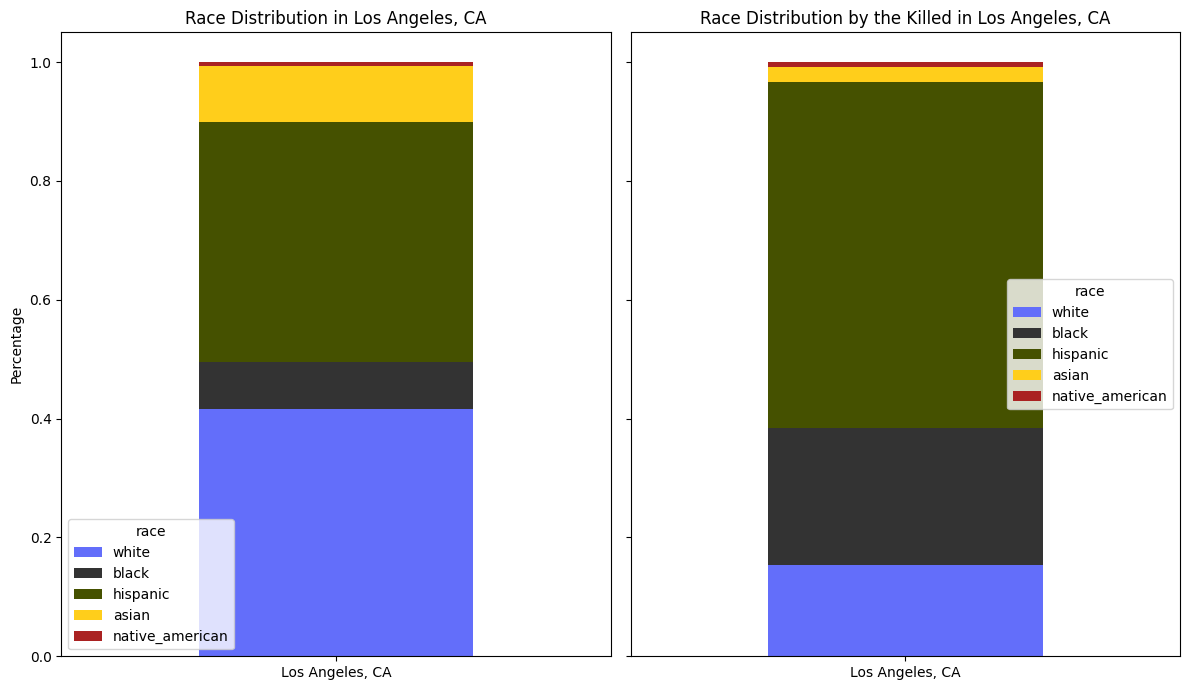

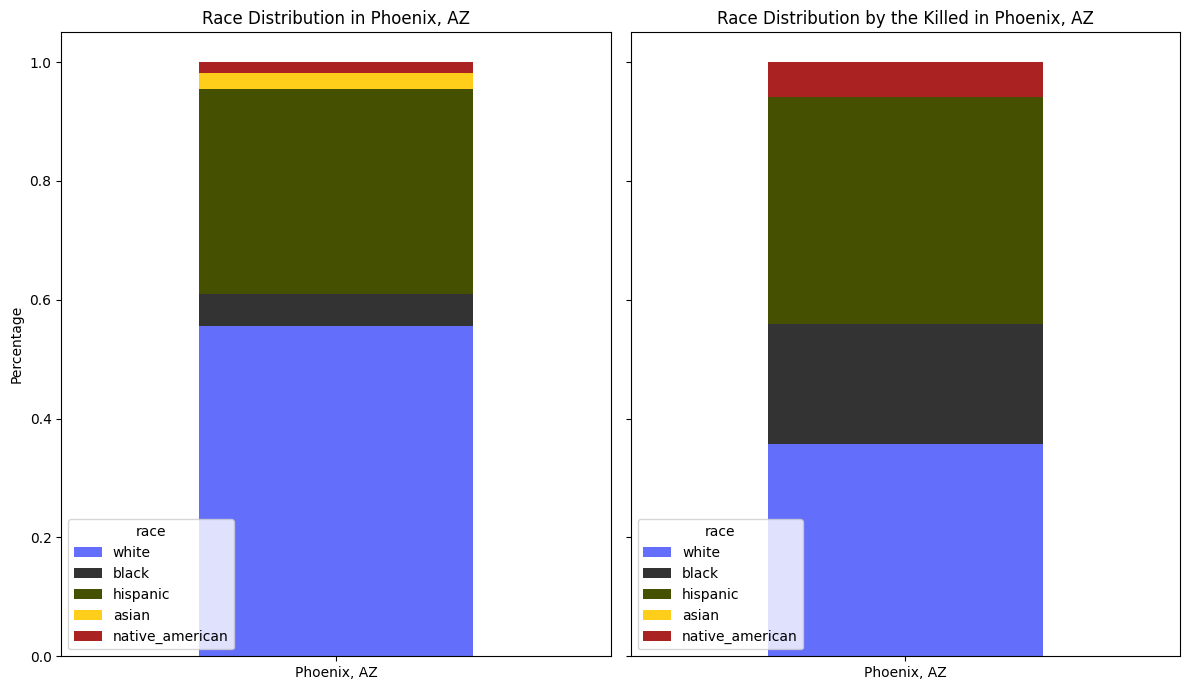

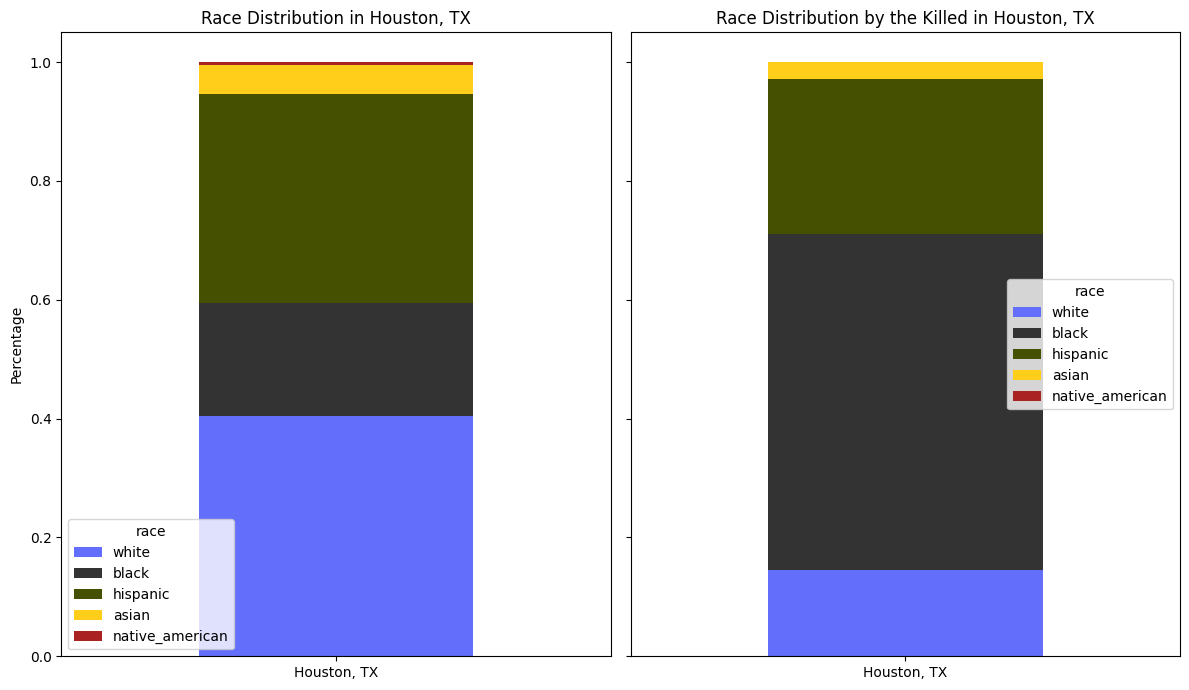

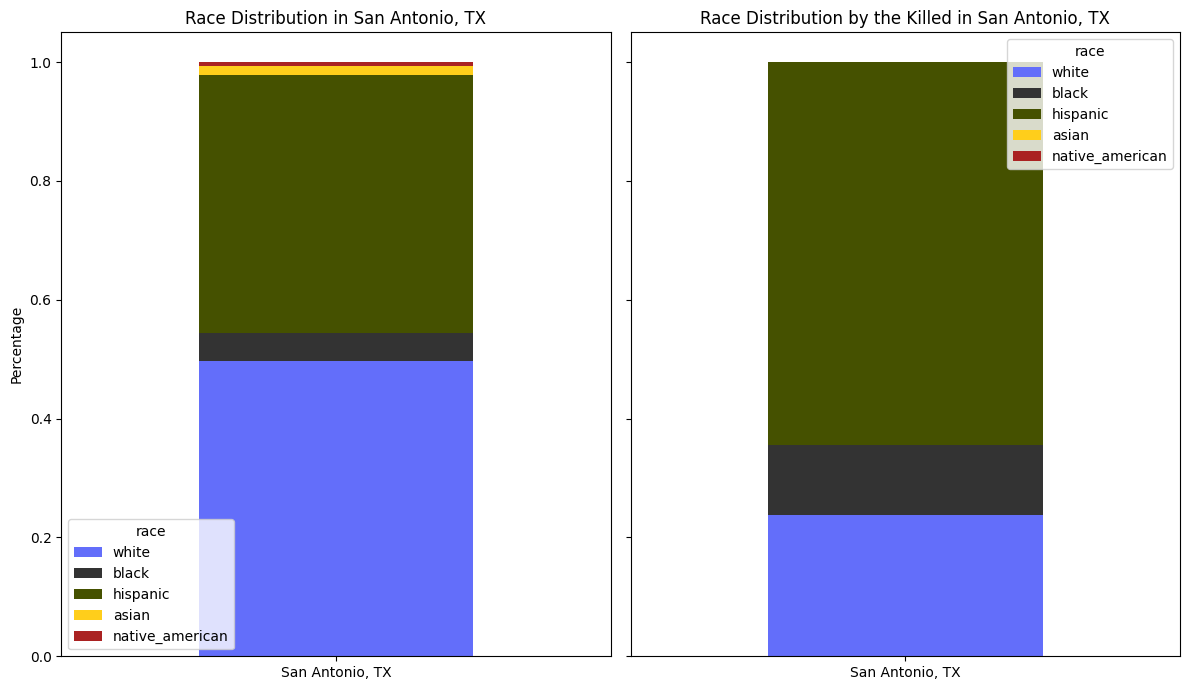

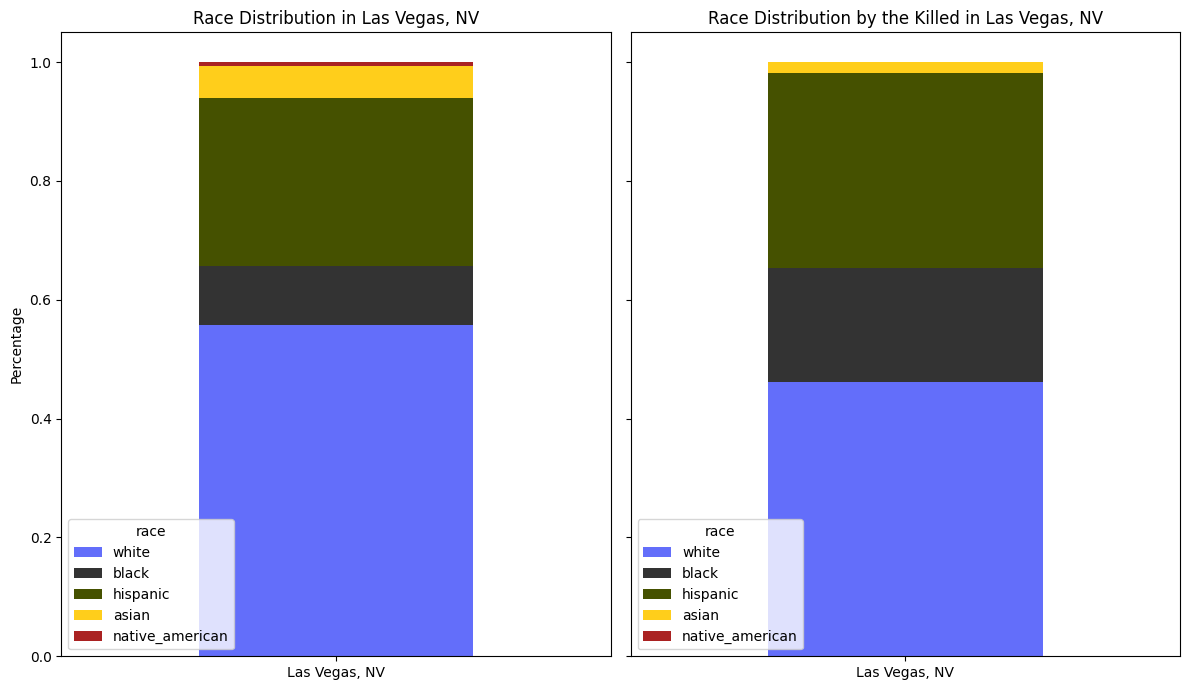

In [50]:
#FORTH: MAKING THE GRAPHS

list_5_most_dangerous_cities = melt_race_dangerous_cities.City.head(5).unique().tolist()
for city in list_5_most_dangerous_cities:
    temp_melt_race_dangerous_cities = melt_race_dangerous_cities[melt_race_dangerous_cities["City"] == city]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7), sharey=True)

    pop_data = temp_melt_race_dangerous_cities[temp_melt_race_dangerous_cities["variable"] == "pop"]
    pop_data = pop_data.pivot(index="City", columns="race", values="value")
    pop_data = pop_data[["white", "black", "hispanic", "asian", "native_american"]]

    killed_data = temp_melt_race_dangerous_cities[temp_melt_race_dangerous_cities["variable"] == "killed"]
    killed_data = killed_data.pivot(index="City", columns="race", values="value")
    killed_data = killed_data[["white", "black", "hispanic", "asian", "native_american"]]

    pop_data.plot(kind='bar', stacked=True, ax=axes[0], color=COLOR_RACE_PALETTE)
    axes[0].set_title(f"Race Distribution in {city}")
    axes[0].set_xlabel("")
    axes[0].set_ylabel("Percentage")
    axes[0].tick_params(axis='x', rotation=0)

    # Plot para a participação dos mortos
    killed_data.plot(kind='bar', stacked=True, ax=axes[1], color=COLOR_RACE_PALETTE)
    axes[1].set_title(f"Race Distribution by the Killed in {city}")
    axes[1].set_xlabel("")
    axes[1].set_ylabel("Percentage dos Mortos")
    axes[1].tick_params(axis='x', rotation=0)

    plt.tight_layout()
    plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [51]:
states_with_most_fatalities = df_fatalities["state"].value_counts()

fig = px.choropleth(states_with_most_fatalities,
    locations=states_with_most_fatalities.index,
    color = states_with_most_fatalities.values,
    locationmode = 'USA-states',
    color_continuous_scale=COLOR_GOOD_TO_BAD)

fig.update_layout(
    title_text = "States with the Most Police Killings",
    geo_scope='usa')

fig.show()

In [52]:
corr_poverty_policeviolence = pd.merge(state_poverty_rate, states_with_most_fatalities, left_index=True, right_index=True)
corr_poverty_policeviolence = corr_poverty_policeviolence.rename(columns={"count": "Fatalities"})
corr_poverty_policeviolence = corr_poverty_policeviolence.sort_values(by="Mean Poverty Rate", ascending=False)

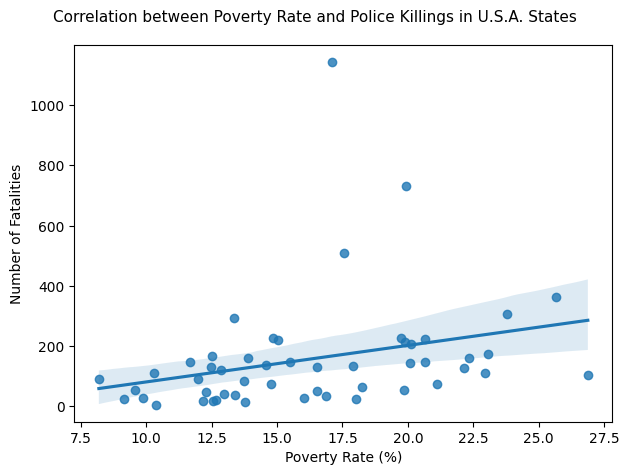

In [53]:
regplot = sns.regplot(data=corr_poverty_policeviolence, x="Mean Poverty Rate", y="Fatalities")
regplot.set_xlabel("Poverty Rate (%)")
regplot.set_ylabel("Number of Fatalities")
regplot.figure.suptitle("Correlation between Poverty Rate and Police Killings in U.S.A. States", fontsize=11)
regplot.figure.tight_layout()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [54]:
df_fatalities["month_year"] = df_fatalities.date.dt.strftime('%Y-%m')
fatalities_per_month_year = df_fatalities.month_year.value_counts()
fatalities_per_month_year = fatalities_per_month_year[:-1] #Removing the last month, because it is not complete.
fatalities_per_month_year.sort_index(inplace=True)

In [55]:
fig = px.scatter(fatalities_per_month_year,
                 x=fatalities_per_month_year.index,
                 y = fatalities_per_month_year.values,
                 color = fatalities_per_month_year.values,
                 color_continuous_scale=COLOR_GOOD_TO_BAD)
 
fig.update_layout(title="Number of Policy Fatalities Per Month",
                   xaxis_title="Year",
                   yaxis_title="Number of Fatalities",
                   coloraxis_showscale=False)

fig.show()

In [56]:
cum_fatalities_per_month_year = fatalities_per_month_year.cumsum(axis=0)
fig = px.line(cum_fatalities_per_month_year, x=cum_fatalities_per_month_year.index, y = cum_fatalities_per_month_year.values)
 
fig.update_layout(title="Number of Policy Fatalities Over Time",
                   xaxis_title="Year",
                   yaxis_title="Number of Fatalities")

fig.show()